In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

a.

In [1]:
def fft_dif(input,N):
    num = int(np.log2(N))

    a1 = []
    a2 = []
    a3 = []
    a4 = []

    def bitreversal(num, size):
        binary = bin(num)
        reverse = binary[-1:1:-1]
        reverse += (size - len(reverse))*'0'
        return int(reverse,2)

    a1 = input.copy()

    for i in range(num-1,-1,-1):
        for j in range(0,int(N/(2**(i+1)))):
            m=0
            for k in range(2*j*(2**i),2*j*(2**i)+(2**i)):
                W = np.exp(-1j*2*m*np.pi/(2**(i+1)))
                a2.insert(k, a1[k] + a1[k+(2**i)])
                a2.insert((k+2**i), (a1[k] - a1[k+(2**i)])*W)
                m += 1
        a1=a2.copy()
        a2.clear()

    for i in range(2**num):
        val = bitreversal(i, num)
        a4.insert(i, a1[val])

    for i in range(len(a1)):
        a3.insert(i, round(a4[i].real,3) + 1j*round(a4[i].imag, 3))
    return np.asarray(a3)

In [4]:
x = np.array([1,1,1,1,0,0,0,0])
fft_dif(x,8)

array([4.+0.j   , 1.-2.414j, 0.+0.j   , 1.-0.414j, 0.+0.j   , 1.+0.414j,
       0.+0.j   , 1.+2.414j])

b.

<StemContainer object of 3 artists>

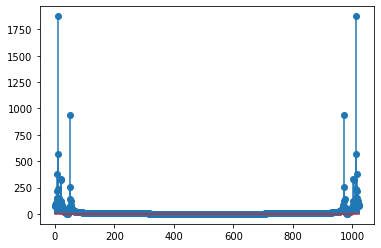

In [5]:
fs = 1000
t = np.arange(0,1.024,1/fs)
x = 4*np.sin(2*np.pi*10*t)+np.sin(2*np.pi*20*t)+2*np.sin(2*np.pi*50*t)
plt.stem(abs(fft_dif(x,1024)))